# Séance nº1 du 6 novembre 2019 : statistiques descriptives ; algorithme
## 1. Introductions
#### 1.1. admin : Objectifs des séances de TP + MCC
* applications du cours (traitement et description de données : statistiques, géophysique : intégration)
* algorithme et programmation (réviser cours de INF111)
* maitriser un outil de calcul sur votre portable (autonomie), voire plusieurs outils
* contenu : traitement de données, statistiques descriptives; algorithme; intégration numérique; traitement des données (interpolation; EOF, FFT, etc.)
MCC : 2 contrôle continus (dont exercice complet) pour 50% de la moyenne

#### 1.2 Différents logiciels pour différentes utilisations : généralistes à très spécialisés (par ex. traitement de la date, géo-référencement, bibliothèques spécifiques)
## 2. Exercice 1 : description statistique des températures à Genève (cf. cours de maths nº4)
#### 2.1. Les formats de données
Format ‘brut’ en texte ASCII avec méta-données (entête, référence, etc.).
Les problèmes du format texte : le séparateur de colonnes (CSV) ; le séparateur décimal; les méta-données (mélange type texte et numérique); le codage des sauts de ligne : CR vs. LF.
Autres formats : binaire (netCDF : dédié), propriétaires (XLS, ODF, etc.)

* Données ‘tabulées’ c’est à dire mises sous forme de tableau, avec comme séparateur de colonne : tabulation
(format TSV), point virgule (format CSV), sinon espaces. A l’importation des données, utiliser le bon
séparateur et veiller à ce que les colonnes soient correctement séparées.
* Séparateur décimal : le format international est le point. Si vous êtes en format français (virgule), deux
possibilités : soit garder ce format et remplacer dans les données les points par des virgules ; soit changer de
format en modifiant les préférences du tableur.

#### 2.2 Importer le tableau des températures (moyennes mensuelles) à la station de Genève-Cointrin (texte brut).

#### 2.3 Vérifier de visu les températures de l'année 1880. Idem pour les valeurs du mois de Janvier (Python : commande print).

#### 2.4 Faire un graphe des températures des mois de juin. A quoi correspondent les valeurs de 999.9 ? Les remplacer (comment et par quoi ?).

* Très important : très souvent il manque des données dans les séries de mesures. Parce que les données manquent ou sont parcellaires, ou à cause de problème sur les mesures qui les a exclues (les données sont
vérifiés et leur homogénéité est testée). L’absence de données est ‘codée’ par une valeur spécifique, très
différente des données elles-mêmes, normalement indiquée dans les méta-données (ici 999.9). D’où la
nécessité d’explorer le fichier de données avec des graphes, ce qui permet de détecter de telles valeurs.
Comment les traiter avec un tableur ? Un tableur supporte les cellules vides, qu’il traite comme une absence
de valeur (prise en compte dans les fonctions, par ex. MOYENNE), donc la solution est simple. Pour cela,
remplacer toutes les valeurs 999.9 par un vide.

#### 2.5 Calculer, avec toutes les années disponibles sur la période 1880-2017 : moyenne, écart-type, minimum et maximum, pour chaque mois.
#### 2.6 Faire un graphe des ‘normales saisonnières’ (moyennes mensuelles) pour Genève. Ajouter les courbes correspondant à ±1σ, les valeurs maximales et minimales.

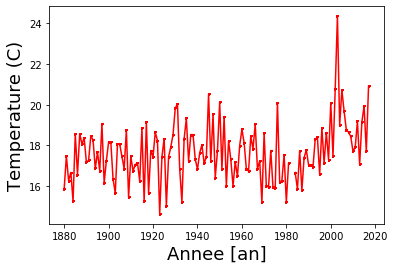

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater


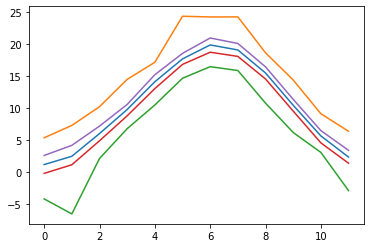

In [3]:
# bibliothèques 
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------------------------------------------

#Lecture des donnees dans un fichier.
temp_gen = np.loadtxt('geneve_homogen.csv'
                      ,skiprows=1);

#print(temp_gen[:,0] );
# Temperature mois du juin

year = temp_gen[:,0];
tjuin = temp_gen[:,6];
tjuin[tjuin > 999.] = np.nan

plt.plot(year,
         tjuin,
         marker='+',
         color='r',
         ms=3,mec='r',
         mew=2,
         linestyle='-',
         label='Temperature Juin');
plt.xlabel("Annee [an]", fontsize=18);
plt.ylabel("Temperature (C)", fontsize=18);
plt.show(block=False)


# Temperature moyenne d apres la formule
# Nombre de donnees valide
nbvalue = tjuin.size - np.count_nonzero(np.isnan(tjuin))
mtjformule = np.nansum(tjuin) /nbvalue


#Fmtj = np.nanmean(tjuin)
#Fsdtjuin = np.nanstd(tjuin)
#Fmintjuin = np.nanmin(tjuin)
#Fmaxtjuin = np.nanmax(tjuin)

#print(Fmtj, Fsdtjuin, Fmintjuin, Fmaxtjuin)


temp_gen[temp_gen > 999.] = np.nan


mean_season=np.nanmean(temp_gen[:,1:13],0)
max_season=np.nanmax(temp_gen[:,1:13],0)
plt.figure()
plt.plot(mean_season)
plt.plot(np.nanmax(temp_gen[:,1:13],0))
plt.plot(np.nanmin(temp_gen[:,1:13],0))
plt.plot(np.nanquantile(temp_gen[:,1:13],0.25,axis=0))
plt.plot(np.nanquantile(temp_gen[:,1:13],0.75,axis=0))




#### 2.7 Tracer un histogramme des températures des mois de juin. Comment sont distribuées ces valeurs ?Déterminer les paramètres de la loi de distribution normale (gaussienne) la plus proche. L’ajouter (si possible) à l’histogramme.

In [4]:
#2.7 Histrogrammes
nb_bins=25;
Iind = np.where(np.isnan(tjuin) == False)
tjuin = tjuin[Iind]
year = year[Iind]

hist, bin_edges = np.histogram(tjuin, density=True, bins=nb_bins)
Inbbox = np.count_nonzero(bin_edges)
Fdeltatemp =  np.diff(bin_edges)
Ftempboxmids =  bin_edges[0:Inbbox-1] + np.diff(bin_edges)/2

Fsim_normal_dens = (1/(2*np.pi*Fsdtjuin**2))**0.5 * np.exp( ((Ftempboxmids - Fmtj)**2 /(-2*Fsdtjuin**2)))
plt.figure()
plt.hist(tjuin, bins=nb_bins, density=True)

plt.plot(Ftempboxmids,
         Fsim_normal_dens,
         color='r',
         ms=3,
         mec='r',
         mew=2,
         label='fonction de densite');
plt.xlabel("Temperature (C)", fontsize=18)
plt.ylabel("f(T)", fontsize=18);

plt.show()


NameError: name 'Fsdtjuin' is not defined

#### 2.8 A quelle année correspond le maximum des mois de juin ? Calculer le rapport (T2003 - Tjuin)/σ. En supposant que la température suit une loi normale (cf. question précédente), calculer la probabilité que la température moyenne d'un mois de juin excède celle de 2003.

In [ ]:
#2.8 Temp. max

Iind = np.where(np.isnan(tjuin) == False)
tjuin = tjuin[Iind]
year = year[Iind]

Iind = np.where(tjuin >= Fmaxtjuin)
print(year[Iind])


#Rapport (t2003-tjuin)/sigma
print((tjuin[Iind] - Fmtj)/Fsdtjuin)

# Fonction de densite de la loi normale centree reduite.

Fx = [x/10.-10 for x in range(200)]
Fsim_normal_dens = (1/(2*np.pi))**0.5 * np.exp( [(x**2)/(-2) for x in Fx])

plt.plot(Fx,
         Fsim_normal_dens,
         color='r',
         ms=3,
         mec='r',
         mew=2,
         linewidth=5,
         label='fonction de densite');
plt.yscale('log')



plt.xlabel("Variable centree reduite", fontsize=18)
plt.ylabel("f(T)", fontsize=18);

plt.show()

# P(X > 4.66)
Fdeltat= 0.01
Ft0 = 4.66
Ft = [Ft0 + Fdeltat*i for i in range(200)]
Fproba = (1/(2*np.pi))**0.5 * np.exp( [(x**2)/(-2) for x in Ft])*Fdeltat
print('La probabilite que T> T2003 est ', np.sum(Fproba))

#### 2.9 Représenter sur un graphe l'évolution des moyennes annuelles de température pour la période 1880-2016.
* Est-ce-qu’un modèle linéaire (a.x+b) décrit correctement l’évolution de ces valeurs ? Calculer les paramètres de ce modèle, ainsi que le coefficient de régression correspondant (R). Ajouter ce modèle sur le graphe.
* Comment discuter le caractère significatif de R, et du modèle utilisé ? Est-ce-qu’utiliser un modèle avec plus de paramètres (par ex. polynôme de degré 10) permet de mieux représenter l’évolution des températures ?
* En utilisant une approche ‘Monte-Carlo’, estimer indépendamment l'incertitude sur la pente a.

In [ ]:
Ftemp = temp_gen[:,1:12]
#2.9 Evolution des temperatures moyennes annuelles
Ftemp = temp_gen[:,1:12]
Iind = np.where(Ftemp >= 999.)
Ftemp[Iind] = np.nan

Ftempmoyan = np.nanmean(Ftemp,axis=1)
year = temp_gen[:,0]



In [ ]:
#2.9 Evolution des temperatures moyennes annuelles
Ftemp = temp_gen[:,1:12]
Iind = np.where(Ftemp >= 999.)
Ftemp[Iind] = np.nan

Ftempmoyan = np.nanmean(Ftemp,axis=1)
year = temp_gen[:,0]

plt.plot(year,
         Ftempmoyan,
         color='r',
         marker='+',
         ms=3,
         mec='r',
         mew=2,
         linewidth=2,
         label='temperature moyenne annuelle');



plt.ylabel("Temperature (C)", fontsize=18)
plt.xlabel("Annee", fontsize=18);


# Determination du modele lineaire

Fybar = np.nanmean(Ftempmoyan)
Fxbar = np.nanmean(year)
Fxybar = np.nanmean(Ftempmoyan[:] * year[:])
Fxbarybar = Fxbar * Fybar
Fx2bar = np.nanmean(year[:] * year[:])
Fxbar2 = Fxbar * Fxbar

Fa = (Fxybar - Fxbarybar) / (Fx2bar-Fxbar2)
Fb = Fybar - Fa*Fxbar

plt.plot(year,
         Fa * year[:] + Fb,
         color='b',
         linewidth=2,
         label='Regression lineaire');


plt.show()

print ('Pente  = ' , Fa)
print ('Ordonnee a l origine =' , Fb)

# Proportion des variation expliquees par le modele lineaire
Fr = np.nansum((Fa * year[:] + Fb-Fybar)**2) /np.nansum((Ftempmoyan - Fybar)**2)
#input("PRESS ENTER TO CONTINUE.")

## 3. Exercice 2 : algorithmes
* revoir séances de INF111
* définition d’un algorithme, différence avec un programme
#### 3.1 Calcul de la somme des entiers de 1 à N
Avec une boucle à compteur, puis avec une boucle ‘tant que’.
#### 3.2 Calcul du factoriel de N
#### 3.3 Trouver la valeur maximale d’un vecteur donné